## Vineeth Reddy
## Data Science and Business Analytics Intern @ The Sparks Foundation
### Data Analysis on Sports(IPL)

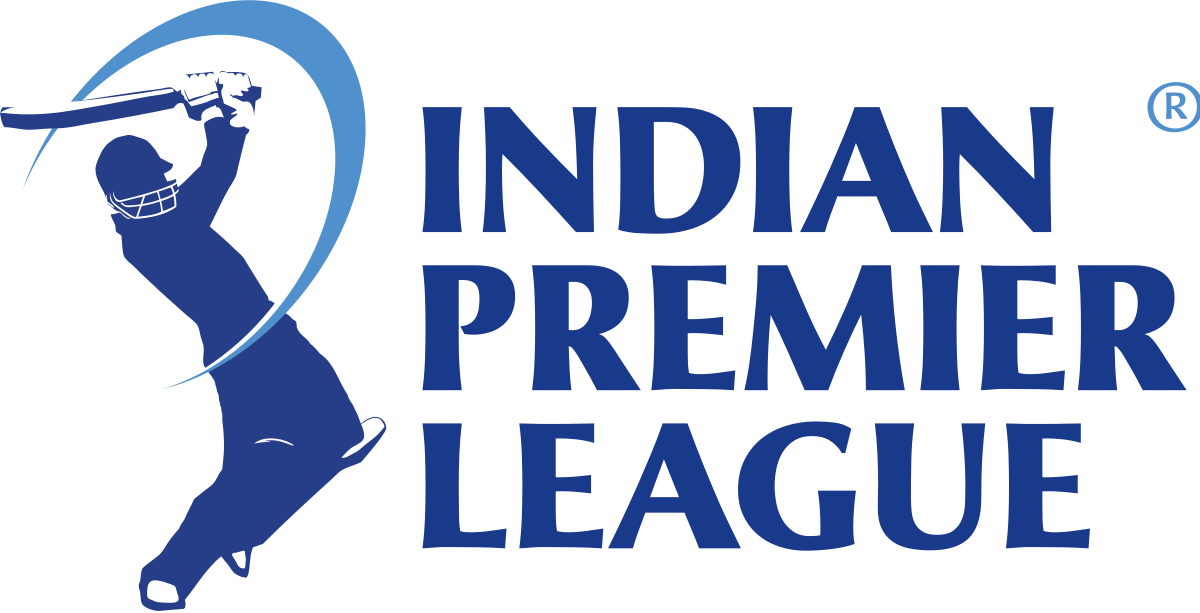

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the first dataframe
df1=pd.read_csv('matches.csv',header=0)
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
#importing the second dataframe
df2=pd.read_csv('deliveries.csv',header=0)
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
#In df1 we dont require the umpires for our analysis,so we drop the umpire columns
df1=df1.drop(columns=['umpire1','umpire2','umpire3'],axis=1)
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [26]:
#info of the first data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 16 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
win_by             756 non-null object
dtypes: int64(5), object(11)
memory usage: 94.6+ KB


In [27]:
#info of the second data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6448 non-null object
dtype

In [6]:
#number of null values in first data
df1.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [7]:
#number of null values in second data
df2.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [8]:
#creating a winning team list
df1['win_by']=np.where(df1['win_by_runs']>0,'Bat first','Bowl first')

In [9]:
#viewing all the unique entries of first data in team1 column
df1['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
#as both teams are same making same names for both
df1.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace=True)
df2.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace=True)

In [11]:
#list of final matches every season
final_matches=df1.drop_duplicates(subset=['season'], keep='last')
final_matches[['season','winner', 'toss_winner']].reset_index(drop=True).sort_values('season')

,season,winner,toss_winner
1,2008,Rajasthan Royals,Rajasthan Royals
2,2009,Deccan Chargers,Royal Challengers Bangalore
3,2010,Chennai Super Kings,Chennai Super Kings
4,2011,Chennai Super Kings,Chennai Super Kings
5,2012,Kolkata Knight Riders,Chennai Super Kings
6,2013,Mumbai Indians,Mumbai Indians
7,2014,Kolkata Knight Riders,Kolkata Knight Riders
8,2015,Mumbai Indians,Chennai Super Kings
9,2016,Sunrisers Hyderabad,Sunrisers Hyderabad
0,2017,Mumbai Indians,Mumbai Indians


## Now let's start visualizing the data

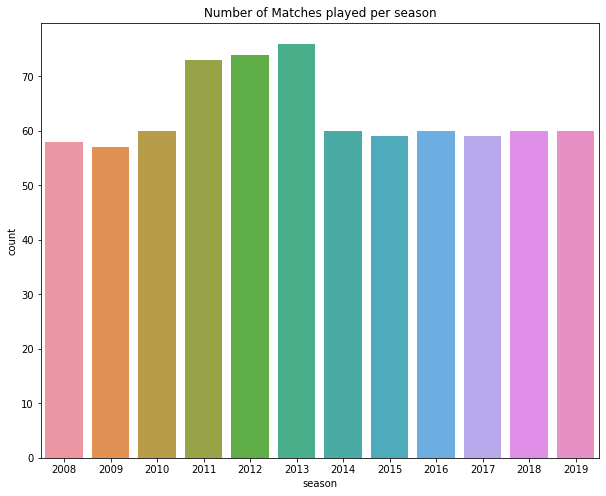

In [22]:
#number of matches played per season
plt.figure(figsize = (10,8))
sns.countplot('season',data=df1)
plt.title("Number of Matches played per season")
plt.show()

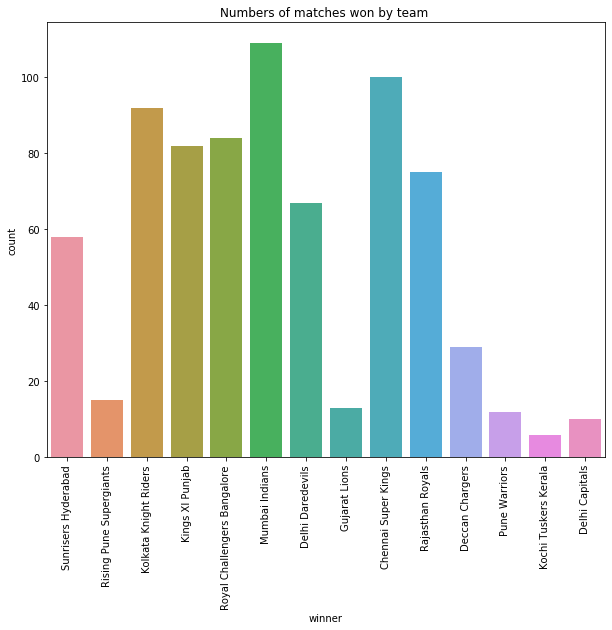

In [24]:
#total number of matches won by every team
plt.figure(figsize = (10,8))
sns.countplot(x='winner',data=df1)
plt.title("Numbers of matches won by team ")
plt.xticks(rotation=90)
plt.show()

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

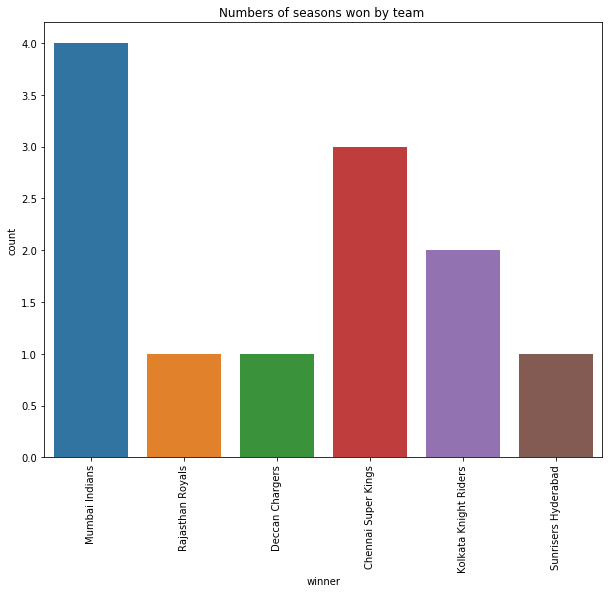

In [25]:
#number of titles won by each team
plt.figure(figsize=(10,8))
season_winner = df1.drop_duplicates('season', keep='last')
sns.countplot(x='winner', data=season_winner)
plt.title("Numbers of seasons won by team ")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

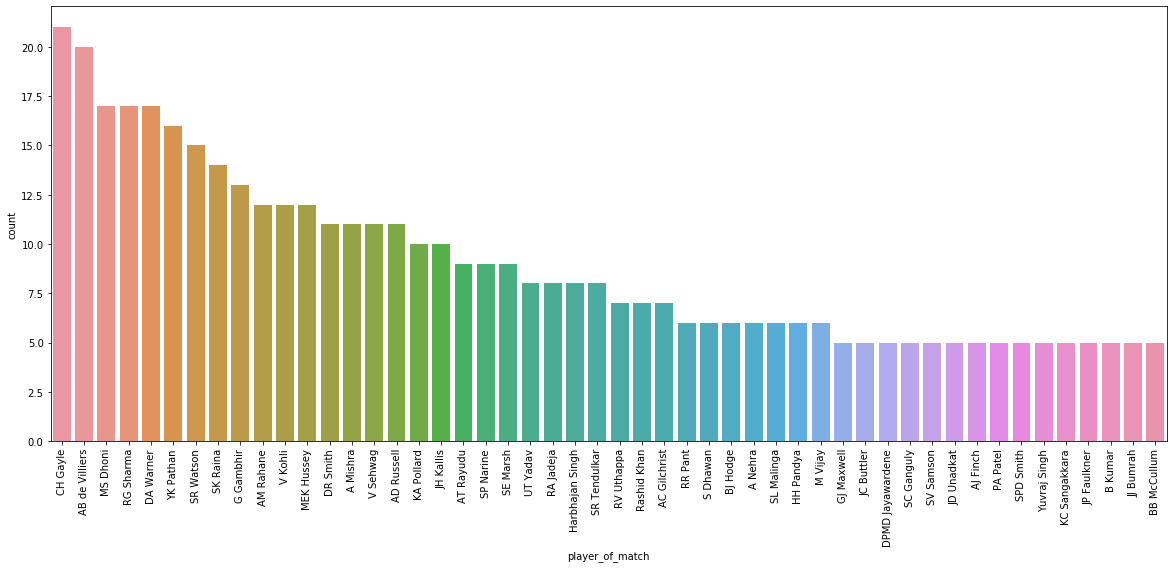

In [13]:
#number of player_of_match awards for each player
plt.figure(figsize=(20,8))
sns.countplot(x=df1['player_of_match'], order=(df1['player_of_match'].value_counts().head(50)).index)
plt.xticks(rotation=90)

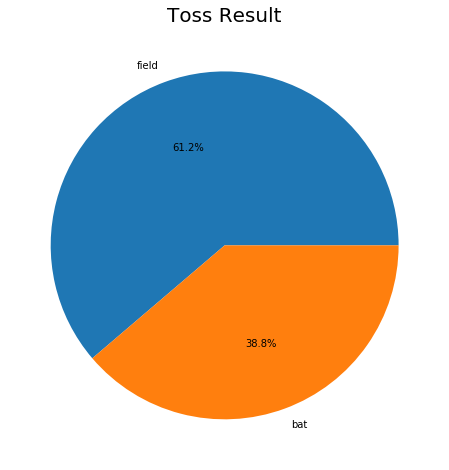

In [14]:
#what players have choosen after winning the toss
toss=df1.toss_decision.value_counts()
labels=np.array(toss.index)
sizes = toss.values
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.title('Toss Result',fontsize=20)
plt.show()

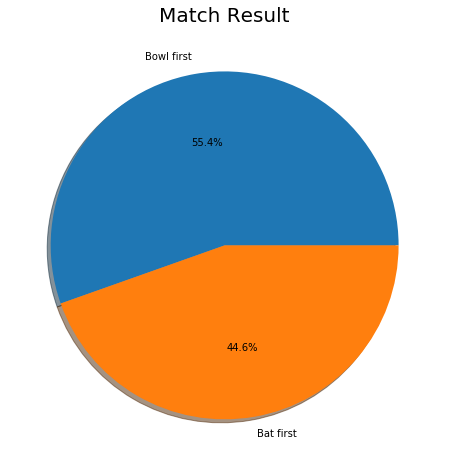

In [15]:
#matches result when choosen batting or bowling first
Win=df1['win_by'].value_counts()
labels=np.array(Win.index)
sizes = Win.values
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Match Result',fontsize=20)
plt.show()

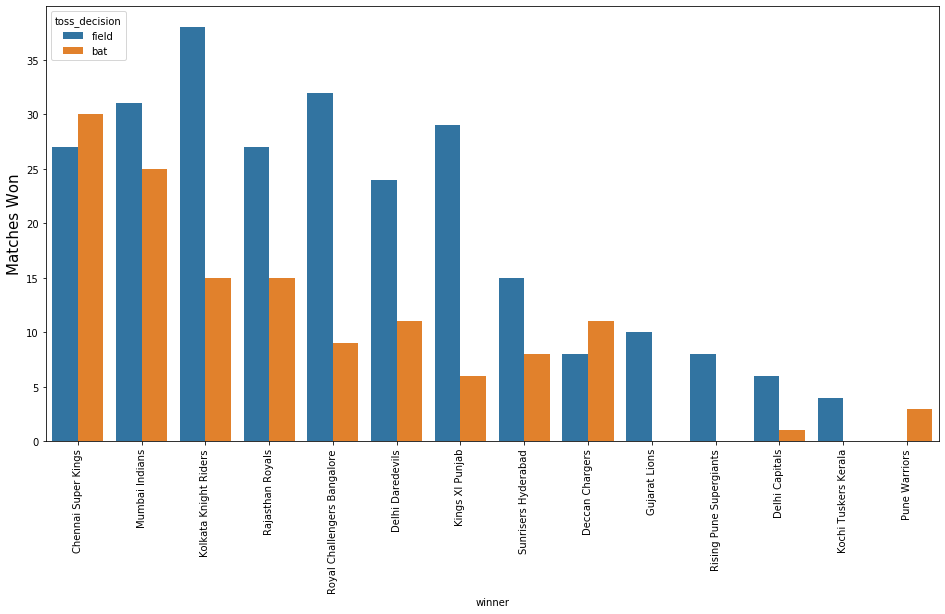

In [16]:
#toss decision by every team after winnig the toss
plt.figure(figsize=(16,8))
toss=df1[df1['toss_winner']==df1['winner']]
sns.countplot("winner", data = toss, hue = 'toss_decision',order = toss['toss_winner'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Matches Won',fontsize=15)
plt.show()

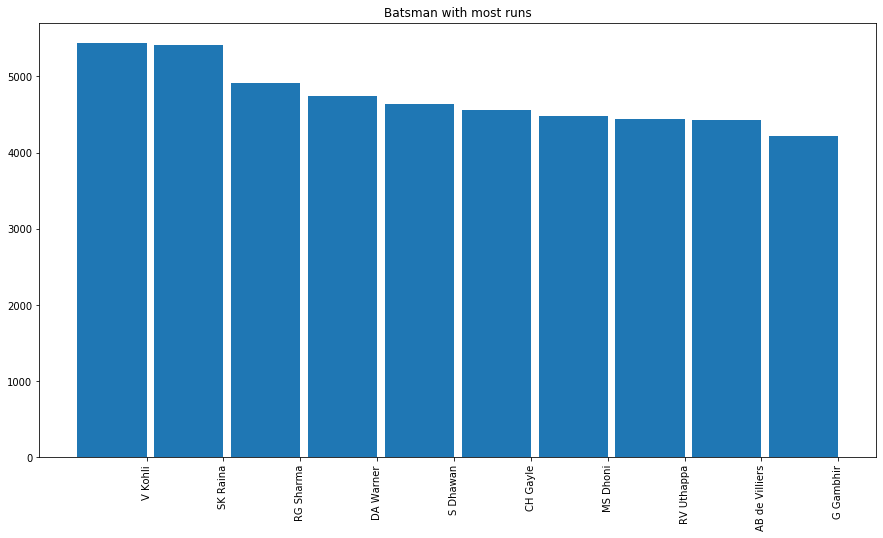

In [17]:
#batsman with more number of runs
batsman_df = df2.groupby('batsman')['batsman_runs'].agg(lambda x: (x).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
batsman_df = batsman_df.iloc[:10,:]

labels = np.array(batsman_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(batsman_df['batsman_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_title("Batsman with most runs")
plt.show()

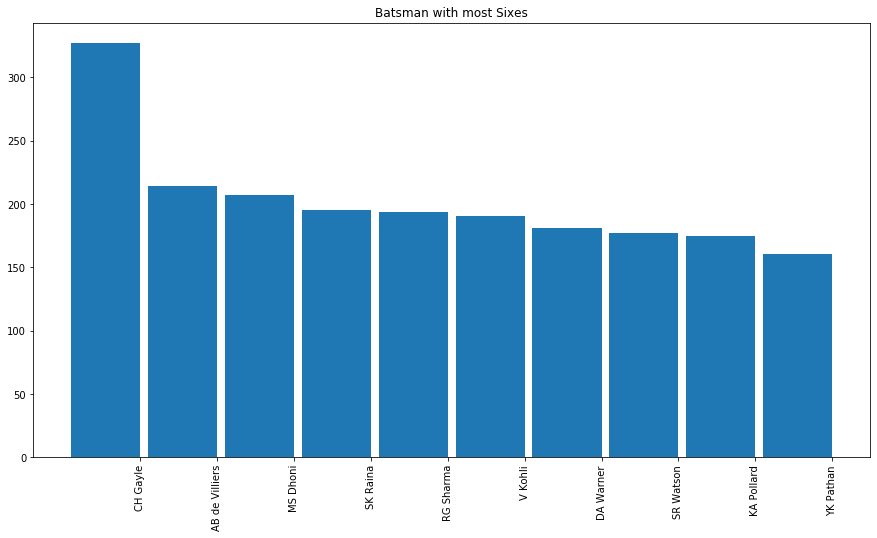

In [18]:
#batsman with more number od sixes
batsman_df = df2.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
batsman_df = batsman_df.iloc[:10,:]

labels = np.array(batsman_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(batsman_df['batsman_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_title("Batsman with most Sixes")
plt.show()

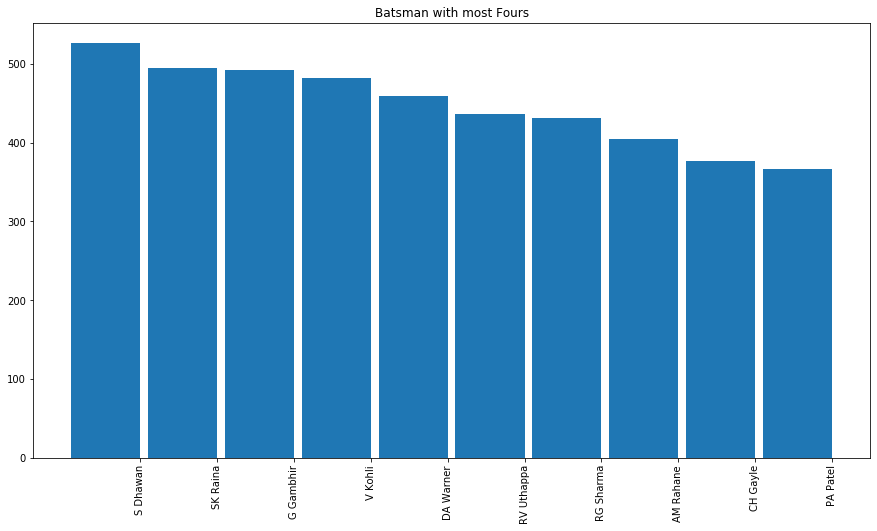

In [19]:
#batsman with most number pf fours
batsman_df = df2.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
batsman_df = batsman_df.iloc[:10,:]

labels = np.array(batsman_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(batsman_df['batsman_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_title("Batsman with most Fours")
plt.show()

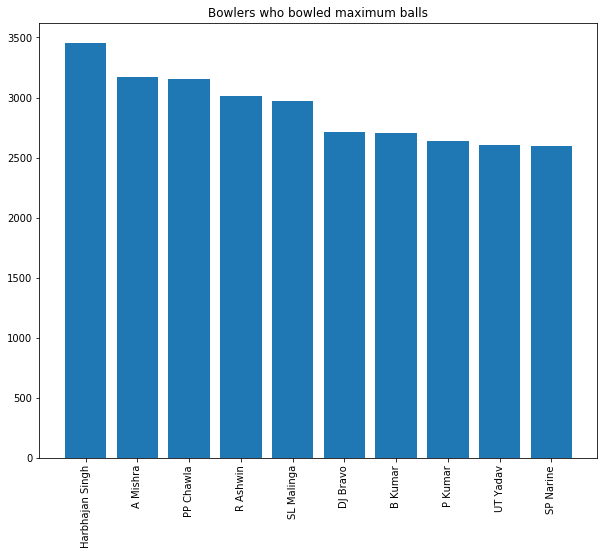

In [20]:
#Bowlers with maximum deliveries
df = pd.merge(df1, df2, left_on='id', right_on='match_id')
bowler = df['bowler'].value_counts()[:10]

plt.figure(figsize=(10,8))
plt.bar(x=bowler.index, height=bowler.values)

plt.title('Bowlers who bowled maximum balls')

plt.xticks(rotation=90)
plt.show()

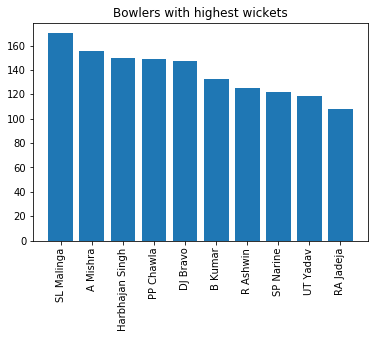

In [21]:
#Highest wicket taking bowlers
bowling_wickets= df2[df2['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')

bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 

plt.bar(top_bowlers['bowler'],top_bowlers['Wickets'])
plt.xticks(rotation=90)

plt.title('Bowlers with highest wickets')
plt.show()

### INSIGHTS:
#### The highest number of matches played in IPL season was in 2013
#### Teams which Bowl first has higher chances of winning then the team which bat first
#### After winning toss more teams decide to do fielding first.
#### Most players of match award is won by CH gayle
#### Team which has won most matches is Mumbai Indians
#### Team which has won most season finals is Mumbai Indians
#### leading run scorer in IPL is Virat kholi
#### The highest number of six hit by player is CH gayle
#### The highest number of four hit by player is Shikar Dhawan
#### The highest wicket taking blower is SL Malinga

# CONCLUSION:
### Advertisement business is a large market with lot of money involved so it is important to choose where and how to advertise. So, it is best practise to analyse the data and choose where to advertise 
### 1.) The teams that can be recommended for companies to endorse are: Mumbai Indians, Chennai Super Kings and Kolkata Knight Riders.
### 2.) The recommended batman for companies to endorse could be: CH Gayle, AB de Villiers, V Kohli, S Dhawan, SK Raina, RG Sharma, MS Dhoni and G Gambhir(as they are the top 3 players with most man of match awards, runs, fours and sixes)
###  3.) The recommended bowler for companies to endorse could be: SL Malinga, Harbajan Singh and A.Mishra.(as they are the top 3 wicket taking bowlers)